In [ ]:
import numpy as np

X = [1.8, 2.0, 1.7, 1.9, 1.6]
Y = [2.2, 1.5, 2.3, 1.7, 1.3]
Z = [1.8, 1.8, 1.8, 1.8, 1.8]

print (np.mean(X),np.mean(Y),np.mean(Z))

In [ ]:
they all have a same MEAN, but ther are clearly different! 
variance : 

In [ ]:
print (np.var(X),np.var(Y),np.var(Z))

In [ ]:
X = [3, -3, 3, -3]
print(np.mean(X), np.std(X))
# but if we just subtract from the mean, 0, and divide by 4, will be zero which is not correct, 
# variance is just the square of the standard deviation.


In [ ]:
 X = [1, -1, 1, -2, -1, 2, 1, 2, -1, 1, -1, 2, 1, -2, 100]
print('Variance of X with outlier = {:6.2f}'.format(np.var(X)))
print('Variance of X without outlier = {:6.2f}'.format(np.var(X[:-1])))
# mean sensitivity to outlier 

In [ ]:
Do we want to swamp the computation so we know there is an outlier,
or incorporate the outlier and still provide an estimate close to the value absent the outlier? 
 it depends on your problem.

In [ ]:
The point to gather from this is that these summary statistics always tell an incomplete story about our data.
In this example variance as defined by Gauss does not tell us we have a single large outlier. 
However, it is a powerful tool, as we can concisely describe a large data set with a few numbers.
If we had 1 billion data points we would not want to inspect plots by eye or look at lists of numbers; 
summary statistics give us a way to describe the shape of the data in a useful way.

In [ ]:
# central limit theorem  , expected value 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Settings ---
np.random.seed(0)
sample_size = 10
num_samples = 1000

# --- Original (skewed) population distribution ---
population_data = np.random.exponential(scale=1.0, size=5000)

# --- Sample means for CLT ---
sample_means = [
    np.mean(np.random.exponential(scale=1.0, size=sample_size))
    for _ in range(num_samples)
]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(population_data, bins=40, edgecolor='black')
plt.title("Original Distribution (Exponential)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)

# Right: Distribution of sample means
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title(f"CLT: Distribution of Sample Means (n={sample_size})")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show();


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Settings ---
np.random.seed(0)
sample_size = 30        # number of dice rolls per sample
num_samples = 1000      # how many sample means we compute

# --- Original population: single dice rolls ---
population_data = np.random.randint(1, 7, size=5000)  # values 1–6

# --- Sample means (CLT demonstration) ---
sample_means = [
    np.mean(np.random.randint(1, 7, size=sample_size))
    for _ in range(num_samples)
]

# --- Plot both distributions ---
plt.figure(figsize=(12, 5))

# Left: Original dice roll distribution (uniform)
plt.subplot(1, 2, 1)
plt.hist(population_data, bins=np.arange(1, 8), edgecolor='black', align='left')
plt.title("Original Distribution of Dice Rolls (Uniform)")
plt.xlabel("Dice Value")
plt.ylabel("Frequency")
plt.xticks([1, 2, 3, 4, 5, 6])
plt.grid(True, linestyle="--", alpha=0.5)

# Right: Distribution of sample means
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title(f"CLT: Distribution of Sample Means (n={sample_size})")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# expected value 

In [ ]:
# Possible outcomes of a fair six-sided dice
outcomes = [1, 2, 3, 4, 5, 6]

# Probability of each outcome (fair dice)
probabilities = [1/6] * 6

# Calculate expected value
expected_value = sum([x * p for x, p in zip(outcomes, probabilities)])
print(f"Expected value of a dice roll: {expected_value}")

# This tells us that if we roll the dice many times, the average value will tend to 3.5.

In [ ]:
# Outcomes of the dice
outcomes = [1, 2, 3, 4, 5, 6]

# Weighted probabilities for each outcome
probabilities = [0.05, 0.05, 0.2, 0.2, 0.3, 0.2]

# Check that probabilities sum to 1
print(f"Sum of probabilities: {sum(probabilities)}")

# Calculate expected value
expected_value = sum([x * p for x, p in zip(outcomes, probabilities)])
print(f"Expected value of the biased dice roll: {expected_value}")


In [ ]:
# pdf, pmf


In [ ]:
A Binomial random variable counts the number of “successes” in a fixed number of independent trials,
where each trial has the same probability of success.
Number of trials n, Probability of success 𝑝 , Number of successes 𝑘

PMF (Probability Mass Function) discrete values 
we calculate exact probabilities using the PMF

In [ ]:


# Example1 in notebook
from scipy.stats import binom
from scipy.stats import distributions
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

n = 30  #  number of experiment 
p = 0.1#  probability of sucess
r_values = list(range(n + 1))
dist = [binom.pmf(r, n, p) for r in r_values ]
plt.bar(r_values, dist)

In [ ]:
# Example3 in notebook
alpha = 10 #5
beta = 1#5
Nsamp = 201 # no of points to sample at

p = np.linspace(0,1,Nsamp)
pdense = distributions.beta.pdf(p,alpha,beta) # probability  function
plt.plot(p,pdense)


# The Beta distribution is a continuous probability distribution 
# often used to model probabilities or proportions, 
# especially when you’re unsure about the true probability and want a flexible model
# extreme case very opposite of ecah other

In [ ]:
The PDF does not give probabilities directly, only density. To get a probability over an interval, 
you integrate the PDF or use the CDF:

In [ ]:
# Example3 in notebook
from scipy.integrate import trapz, simps
x , dx = np.linspace(0,0.6,Nsamp,retstep=True)
f = distributions.beta.pdf(x,alpha,beta) # probability mass function

print((np.sum(f)*dx))
print(trapz(f, x))
print(simps(f, x))

In [ ]:
# guassian distribution
# variance    standard deviation **  2

import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt 
  

## x-axis for the plot
x_data = np.arange(4, 16, 0.01)
  
## y-axis as the gaussian
y_data = stats.norm.pdf(x_data, 10, .5)  # x, mean and standard deviation
  
## plot data
plt.plot(x_data, y_data)

In [ ]:
The normal distribution ( Gaussian distribution) is one of the most important probability distributions in statistics.
Its importance comes from both its mathematical properties and its prevalence in real-world phenomena.


The Central Limit Theorem states that the sum of a large number of independent, identically distributed random variables
tends toward a normal distribution,
regardless of the original distribution. 


follow a normal distribution:

Heights, weights, and IQ scores

Measurement errors in scientific experiments

In [ ]:
# Beliefs as Gaussians
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

xs = range(500)
ys = randn(500)*1. + 10.
plt.plot(xs, ys)
print('Mean of readings is {:.3f}'.format(np.mean(ys)))

In [ ]:
from collections import namedtuple
gaussian = namedtuple('Gaussian', ['mean', 'var']) # (mean , variance)
xs = np.arange(15, 30, 0.05)

y_data = stats.norm.pdf(xs, 23, 0.2)  # x, mean and standard deviation
y_data1 = stats.norm.pdf(xs, 23, 0.5)  # x, mean and standard deviation
y_data2 = stats.norm.pdf(xs, 23, 1)  # x, mean and standard deviation

plt.plot(xs, y_data ,ls='--')
plt.plot(xs, y_data1,ls='-')
plt.plot(xs, y_data2,ls=':')

In [ ]:
# one dimensional kalman filter
from collections import namedtuple
gaussian = namedtuple('Gaussian', ['mean', 'var'])

def predict(pos, movement):
    return gaussian(pos.mean + movement.mean, pos.var + movement.var)

pos = gaussian(10., .2**2)  # inital position and its variance
move = gaussian(15., .7**2) # displacement and its variance
predict(pos, move)

In [ ]:

def gaussian_multiply(g1, g2):
    mean = (g1.var * g2.mean + g2.var * g1.mean) / (g1.var + g2.var)
    variance = (g1.var * g2.var) / (g1.var + g2.var)
    return gaussian(mean, variance)

In [ ]:
z = gaussian(10., 1.) # Gaussian N(10, 1)
product = gaussian_multiply(z, z)
xs = np.arange(5, 15, 0.1)
ys = [stats.norm.pdf(x, z.mean, z.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}(10,1)$')
ys = [stats.norm.pdf(x, product.mean, product.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}(10,1) \\times \mathcal{N}(10,1)$', ls='--')
plt.legend()
print(product)

In [ ]:
z1 = gaussian(8.5, 1.5)
z2 = gaussian(10.2, .5)

product = gaussian_multiply(z1, z2)
xs = np.arange(5, 15, 0.1)
ys = [stats.norm.pdf(x, z1.mean, z1.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}(10,1)$')
ys = [stats.norm.pdf(x, z2.mean, z2.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}(10,1)$')
ys = [stats.norm.pdf(x, product.mean, product.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}(10,1) \\times \mathcal{N}(10,1)$', ls='--')
plt.legend()
print(product)

In [ ]:
# von misses , why not guassian?
   Because heading is an angle, using the von Mises distribution
    instead of a standard Gaussian. 
    This distribution is like a "Gaussian for circles," perfectly suited for angular data.

In [ ]:
Suppose you measure the heading of a robot. Headings are angles on a circle, not on a straight line.

Example headings:359°, 0°, 1°, 2°

These are all very close to each other.

But if you used a Gaussian distribution, it would think:

359° is very far from 0°

because a Gaussian doesn’t know that angles wrap around.

In [ ]:
he von Mises distribution is:continuous bell-shaped symmetric

defined on a circle (0° wraps smoothly to 360°)

controlled by two parameters:

mean direction μ, concentration κ (like 1/σ² for Gaussian)

It acts exactly like a circular version of the normal distribution.

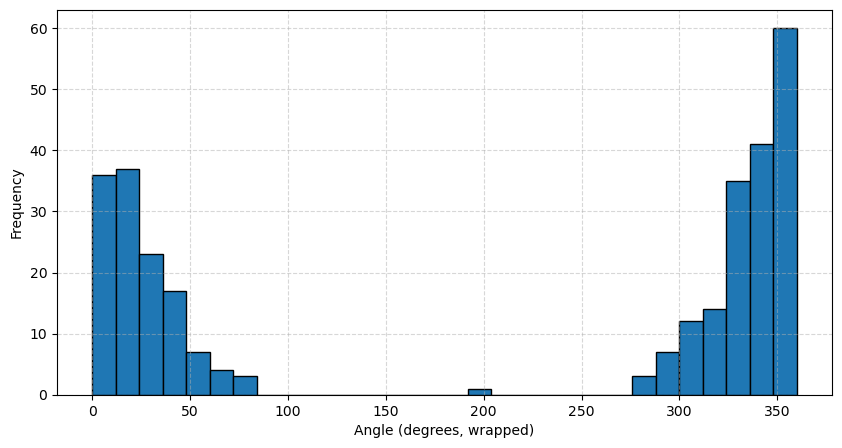

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises

np.random.seed(0)

# True mean heading (degrees)
true_angle_deg = 355
true_angle_rad = np.deg2rad(true_angle_deg)

# von Mises concentration parameter
kappa = 4

# Sample angular data from von Mises
angles = vonmises.rvs(kappa, loc=true_angle_rad, size=300)

# Convert to degrees
angles_deg = np.rad2deg(angles)

# --- WRAP angles to [0, 360) ---
angles_deg = angles_deg % 360

# Plot
plt.figure(figsize=(10,5))
plt.hist(angles_deg, bins=30, edgecolor='black')
plt.xlabel("Angle (degrees, wrapped)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
358°, 1°
Gaussian mean = 179.5° wrong
Circular mean = 359.5°  (correct)

In [3]:
# Example4 in notebook
import numpy as np
import matplotlib.pyplot as plt
positions_id = np.array([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hallway = np.array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])
belief = np.array([1/10]*10)
print(positions_id)
print(belief)

[ 1  2  3  4  5  6  7  8  9 10]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


<BarContainer object of 10 artists>

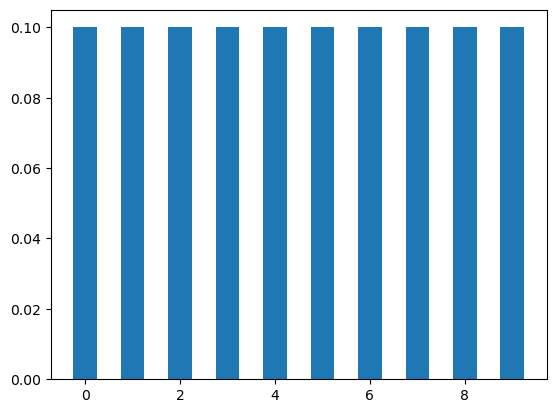

In [4]:
# Example4 in notebook
hallway_position_id = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.bar(hallway_position_id, belief, width = 0.5)

In [ ]:
the first data I get from the sensor is door.For the moment assume the sensor always returns the correct answer. 
I conclude that he is in front of a door, but which one? 

In [5]:
# Example4 in notebook
belief = np.array([1/3, 1/3, 0, 0, 0, 0, 0, 0, 1/3, 0])
print(belief)

[0.33333333 0.33333333 0.         0.         0.         0.
 0.         0.         0.33333333 0.        ]


<BarContainer object of 10 artists>

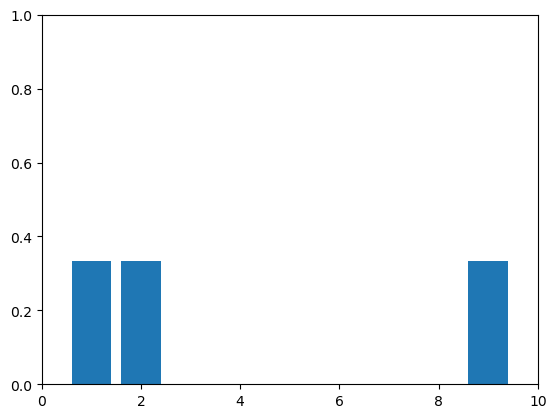

In [6]:
# Example4 in notebook
import matplotlib.pyplot as plt 
ax = plt.gca()
ax.set_xlim([0, 10])
ax.set_ylim([0, 1])
plt.bar(positions_id,belief)  

In [ ]:
This is an improvement in two ways.
I've rejected a number of hallway positions as impossible, and the strength of my belief in the remaining positions has increased from 10% to 33%. 
This will always happen. As our knowledge improves the probabilities will get closer to 100%.

In [7]:
# Example5 in notebook
def update_belief(hall, belief, z, correct_scale):
    for i, val in enumerate(hall):
        if val == z:
            belief[i] *= correct_scale

            
belief = np.array([0.1] * 10)
reading = 1 # 1 is 'door'
aa = update_belief(hallway, belief, z=reading, correct_scale=3.)
print('belief:', belief)
print('sum =', sum(belief))

belief: [0.3 0.3 0.1 0.1 0.1 0.1 0.1 0.1 0.3 0.1]
sum = 1.6000000000000003


In [ ]:
This is not a probability distribution because it does not sum to 1.0. But the code is doing mostly the right thing -
the doors are assigned a number (0.3) that is 3 times higher than the walls (0.1). 

<BarContainer object of 10 artists>

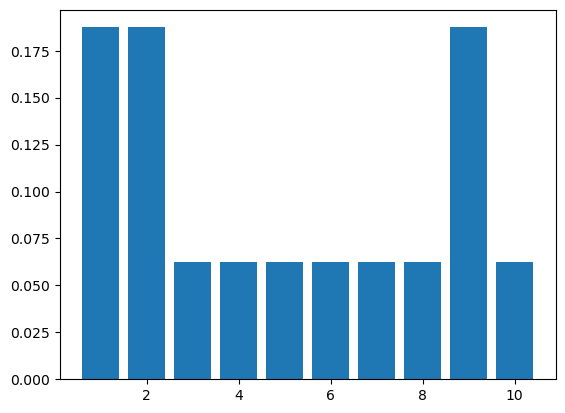

In [9]:
# Example5 in notebook
def scaled_update(hall, belief, z, z_prob):
        scale = z_prob / (1. - z_prob)
        belief[hall==z] *= scale
        return belief / belief.sum()
    

belief = np.array([0.1] * 10)
scaled_update_values =scaled_update(hallway, belief, z=1, z_prob=.75)

plt.bar(positions_id,scaled_update_values)  



In [ ]:
s a general rule you will want to avoid using for loops

In [10]:
# Example5 in notebook
print('sum =', sum(scaled_update_values))
print('probability of door =', scaled_update_values[0])
print('probability of wall =', scaled_update_values[2])

sum = 1.0
probability of door = 0.1875
probability of wall = 0.06249999999999999


In [ ]:
 sum is now 1.0, and that the probability of a door vs wall is still three times larger. 
    The result also fits our intuition that the probability of a door must be less than 0.333, and that the probability of a wall must be greater than 0.0. 

In [ ]:
This result is called the posterior, which is short for posterior probability distribution.
All this means is a probability distribution after incorporating the measurement information (posterior means 'after' in this context). 
 the prior is the probability distribution before including the measurement's information.



In [ ]:
the likelihood. When we computed belief[hall==z] *= scale we were computing 
how likely each position was given the measurement. 

In [11]:
# Example5 in notebook
def update(likelihood, prior):
    return normalize(likelihood * prior)


In [12]:
#Example6 in notebook
def lh_hallway(hall, z, z_prob):
    """ compute likelihood that a measurement matches
    positions in the hallway."""
    
    scale = z_prob / (1. - z_prob)      
    likelihood = np.ones(len(hall))
    likelihood[hall==z] *= scale
    return likelihood

In [13]:
#Example6 in notebook
hallway = np.array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])
likelihood = lh_hallway(hallway, z=1, z_prob=.75)
likelihood

array([3., 3., 1., 1., 1., 1., 1., 1., 3., 1.])

In [ ]:
Computation of the likelihood varies per problem.
the sensor might not return just 1 or 0, but a float between 0 and 1 indicating the probability of being in front of a door. 
It might use computer vision and report a blob shape that you then probabilistically match to a door.
It might use sonar and return a distance reading. 

In [ ]:
incoroporating movement
so far we had just sesnor saying : door or wall

we add another sensor : movement sensor
assume the movement sensor is perfect, and it reports that the dog has moved one space to the right. 
How would we alter our belief array?

In [15]:
# Incorporating Movement
#Example7 in notebook

def perfect_predict(belief, move):
    """ move the position by `move` spaces, where positive is
    to the right, and negative is to the left
    """
    n = len(belief)
    result = np.zeros(n)
    for i in range(n):
         result[i] = belief[(i-move) % n]  #Remainder when a is divided by b
    return result

<BarContainer object of 10 artists>

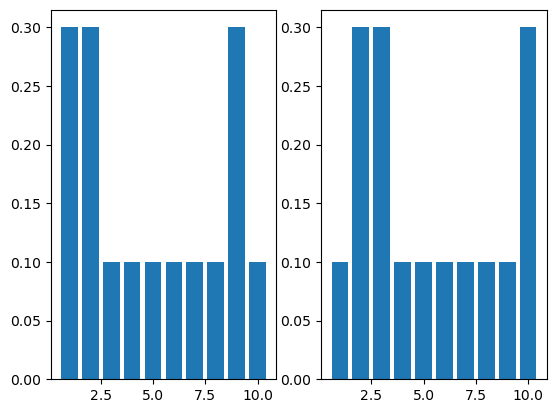

In [16]:
#Example7 in notebook
belief1 = perfect_predict(belief, 1)
plt.subplot(121)
plt.bar(positions_id,belief)  
plt.subplot(122)
plt.bar(positions_id,belief1)  

In [ ]:
If we previously thought there was a 50% chance of  being at position 3, then after he moved one position to the right we should believe that there is a 50% chance he is at position 4. 
The hallway is circular, so we will use modulo arithmetic to perform the shift.

In [ ]:
The system is what we are trying to model or filter. Here the system is our dog. 
The state is our dog's position. 


One cycle of prediction and updating with a measurement is called the state or system evolution, which is short for time evolution.
Another term is system propagation. 

In [ ]:
We model the system behavior with the process model. Here, our process model is that the dog moves one or more positions at each time step. 
This is not a particularly accurate model of how dogs behave. 
The error in the model is called the system error or process error.

In [ ]:
perfect_predict() assumes perfect measurements, but all sensors have noise. 
What if the sensor reported that our dog moved one space, but he actually moved two spaces, or zero? 

Assume that the sensor's movement measurement is 80% likely to be correct, 10% likely to overshoot one position to the right, and 10% likely to undershoot to the left. That is, if the movement measurement is 4 (meaning 4 spaces to the right), the dog is 80% likely to have moved 4 spaces to the right, 10% to have moved 3 spaces, and 10% to have moved 5 spaces.

In [17]:
def predict_move(belief, move, p_under, p_correct, p_over):
    n = len(belief)
    prior = np.zeros(n)
    for i in range(n):
        prior[i] = (
        belief[(i-move) % n]   * p_correct +
        belief[(i-move-1) % n] * p_over +
        belief[(i-move+1) % n] * p_under)
    return prior

<BarContainer object of 10 artists>

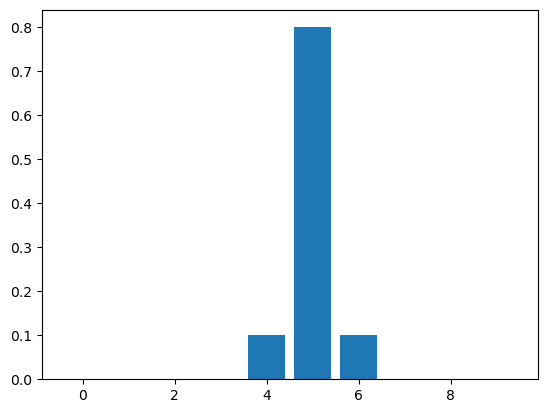

In [18]:
belief = [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]  #  important : 100 % that at position 3 
prior = predict_move(belief, 2, .1, .8, .1)
plt.bar(hallway_position_id,prior)  

array([0.  , 0.  , 0.  , 0.04, 0.38, 0.52, 0.06, 0.  , 0.  , 0.  ])

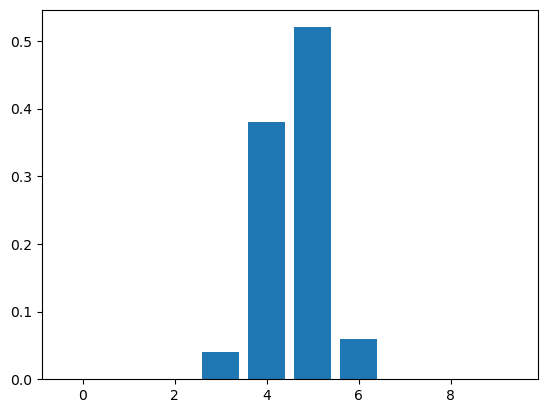

In [19]:
#Example9 in notebook
belief = [0, 0, .4, .6, 0, 0, 0, 0, 0, 0]  #  not 100 percent, it is positon 3 or 4
prior = predict_move(belief, 2, .1, .8, .1)
plt.bar(hallway_position_id,prior)  
prior


In [23]:
#Example10 in notebook
belief = np.array([1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
predict_beliefs = []

for i in range(500):
        belief = predict_move(belief, 1, .1, .8, .1)
        predict_beliefs.append(belief)

print(predict_beliefs[-1])       
        

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [21]:
len(predict_beliefs[-1])

10

In [ ]:
We made the assumption that the movement error is at most one position. But it is possible for the error to be two, three, or more positions. As programmers we always want to generalize our code so that it works for all cases

In [24]:
#Example10 in notebook
def predict_move_convolution(pdf, offset, kernel):
    N = len(pdf)
    kN = len(kernel)
    width = int((kN - 1) / 2)
    prior = np.zeros(N)
    for i in range(N):
        for k in range (kN):
                index = (i + (width-k) - offset) % N
                prior[i] += pdf[index] * kernel[k]
    return prior

(0.0, 1.1)

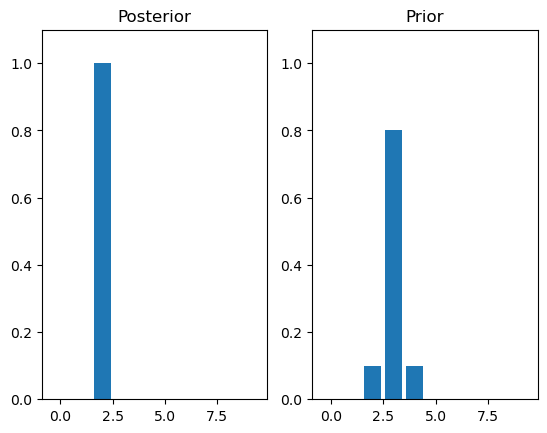

In [25]:
#Example10 in notebook

kernel=[.1, .8, .1]
belief = np.array([0, 0, 1., 0, 0, 0, 0, 0, 0, 0])
prior = predict_move_convolution(belief, offset=1, kernel=[.1, .8, .1])

plt.subplot(121)
plt.bar(hallway_position_id,belief)  
plt.title("Posterior")
plt.ylim(0,1.1)


plt.subplot(122)
plt.bar(hallway_position_id,prior)  
plt.title("Prior")
plt.ylim(0,1.1)

(0.0, 0.6)

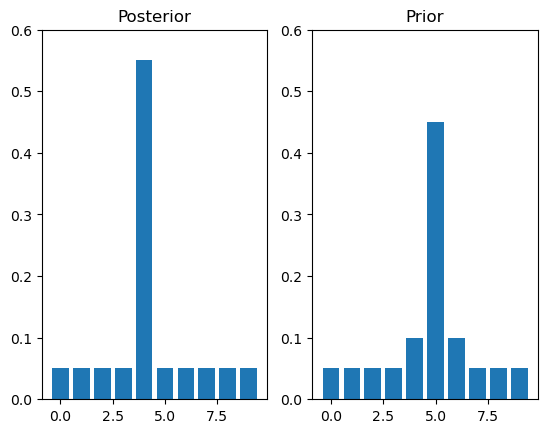

In [26]:
#Example10 in notebook

kernel=[.1, .8, .1]
belief = [.05, .05, .05, .05, .55, .05, .05, .05, .05, .05]
prior = predict_move_convolution(belief, offset=1, kernel=[.1, .8, .1])

plt.subplot(121)
plt.bar(hallway_position_id,belief)  
plt.title("Posterior")
plt.ylim(0,.6)


plt.subplot(122)
plt.bar(hallway_position_id,prior)  
plt.title("Prior")
plt.ylim(0,.6)

(0.0, 0.6)

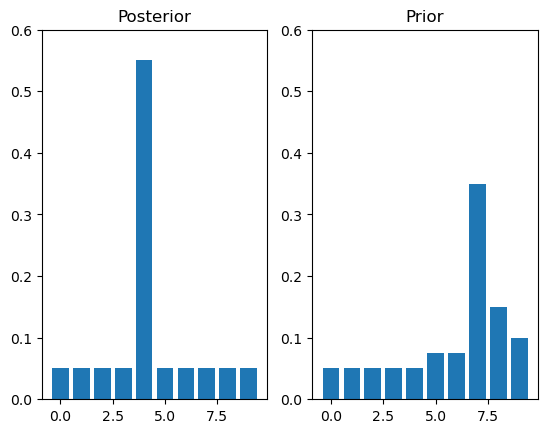

In [27]:
#Example11 in notebook
kernel=[.05, .05, .6, .2, .1]
belief = [.05, .05, .05, .05, .55, .05, .05, .05, .05, .05]
prior = predict_move_convolution(belief, offset=3, kernel=[.05, .05, .6, .2, .1])


plt.subplot(121)
plt.bar(hallway_position_id,belief)  
plt.title("Posterior")
plt.ylim(0,.6)


plt.subplot(122)
plt.bar(hallway_position_id,prior[:])  
plt.title("Prior")
plt.ylim(0,.6)

In [ ]:
The problem of losing information during a prediction may make it seem as if our system would quickly devolve into having no knowledge.
However, each prediction is followed by an update where we incorporate the measurement into the estimate.
The update improves our knowledge. 

In [ ]:
We have already programmed the update and predict steps. All we need to do is feed the result of one into the other, and we will have implemented a dog tracker

In [ ]:
We will input measurements as if the dog started at position 0 and moved right one position each epoch.
As in a real world application, we will start with no knowledge of his position by assigning equal probability to all positions.

In [28]:
# #Example12 in notebook
def update_edited (likelihood, prior):
    output = likelihood * prior
    return output / output.sum()


hallway = np.array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])
prior = np.array([.1] * 10)
likelihood = lh_hallway(hallway, z=1, z_prob=.75)
posterior = update_edited(likelihood, prior)

# here we get our first measurement! fron of a door 

(0.0, 0.5)

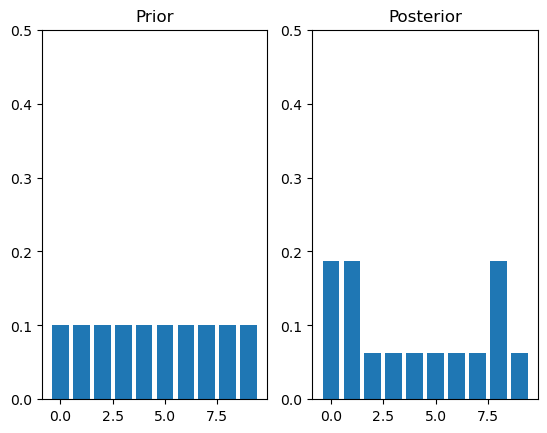

In [29]:
# #Example12 in notebook
plt.subplot(121)
plt.bar(hallway_position_id,prior)  
plt.title("Prior")
plt.ylim(0,.5)

plt.subplot(122)
plt.bar(hallway_position_id,posterior)  
plt.title("Posterior")
plt.ylim(0,.5)

#After the first update we have assigned a high probability to each door position, and a low probability to each wall position.

In [30]:
# #Example13 in notebook
kernel = (.1, .8, .1)
prior = predict_move_convolution(posterior, 1, kernel)

(0.0, 0.5)

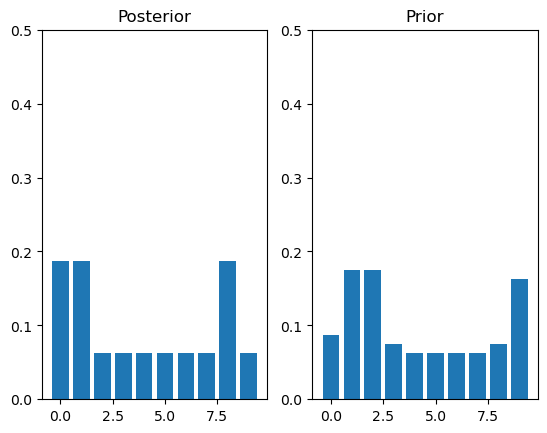

In [31]:
# #Example13 in notebook
plt.subplot(121)
plt.bar(hallway_position_id,posterior)  
plt.title("Posterior")
plt.ylim(0,.5)

plt.subplot(122)
plt.bar(hallway_position_id,prior)  
plt.title("Prior")
plt.ylim(0,.5)

# predict one movement to the right!


#The predict step shifted these probabilities to the right, smearing them about a bit. 
#Now let’s look at what happens at the next sense.

In [ ]:
lets look at what happens at the next sense

In [32]:
# #Example14 in notebook
likelihood = lh_hallway(hallway, z=1, z_prob=.75)
posterior = update_edited(likelihood, prior)

(0.0, 0.5)

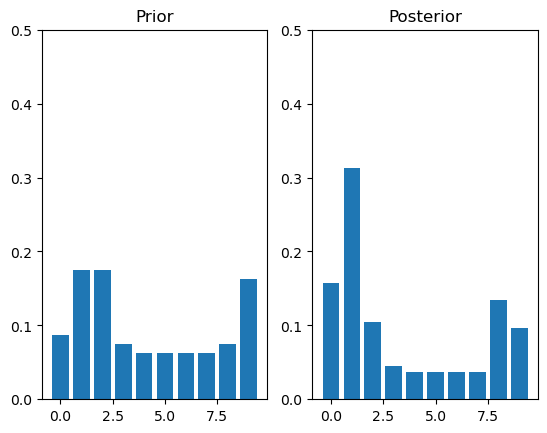

In [33]:
# #Example14 in notebook
plt.subplot(122)
plt.bar(hallway_position_id,posterior)  
plt.title("Posterior")
plt.ylim(0,.5)


plt.subplot(121)
plt.bar(hallway_position_id,prior)  
plt.title("Prior")
plt.ylim(0,.5)

In [ ]:
# Notice the tall bar at position 1. This corresponds with the (correct) case of starting at position 0, sensing
#a door, shifting 1 to the right, and sensing another door. No other positions make this set of observations as likely

In [34]:
# #Example15 in notebook

# Now we will add an predict and then sense the wall.
prior = predict_move_convolution(posterior, 1, kernel)
likelihood = lh_hallway(hallway, z=0, z_prob=.75)
posterior = update_edited(likelihood, prior)

(0.0, 0.5)

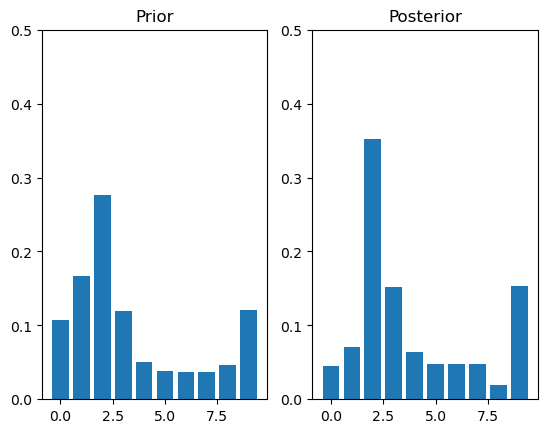

In [35]:
# #Example15 in notebook
plt.subplot(122)
plt.bar(hallway_position_id,posterior)  
plt.title("Posterior")
plt.ylim(0,.5)

plt.subplot(121)
plt.bar(hallway_position_id,prior)  
plt.title("Prior")
plt.ylim(0,.5)




In [ ]:
#This is exciting! We have a very prominent bar at position 2 with a value of around 35%. It is over twice
#the value of any other bar in the plot, and is about 4% larger than our last plot, where the tallest bar was around 31%.

In [ ]:
 Let's see one more cycle.

In [36]:
prior = predict_move_convolution(posterior, 1, kernel)
likelihood = lh_hallway(hallway, z=0, z_prob=.75)
posterior = update_edited(likelihood, prior)

(0.0, 0.5)

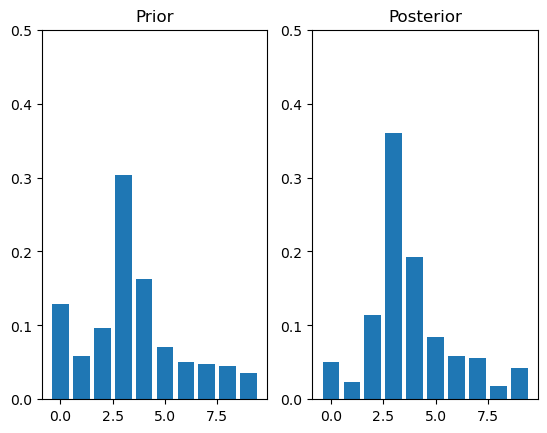

In [38]:
# #Example16 in notebook
plt.subplot(122)
plt.bar(hallway_position_id,posterior)  
plt.title("Posterior")
plt.ylim(0,.5)

plt.subplot(121)
plt.bar(hallway_position_id,prior)  
plt.title("Prior")
plt.ylim(0,.5)

In [ ]:
The Effect of Bad Sensor Data

In [ ]:
You may be suspicious of the results above because I always passed correct sensor data into the functions.
However, we are claiming that this code implements a filter - it should filter out bad sensor measurements. Does it do that?

lets change the layout of the hallway to mostly alternating doors and hallways, and run the algorithm on 6 correct measurements:

In [39]:
hallway = np.array([1, 0, 1, 0, 0]*2)
kernel = (.1, .8, .1)
prior = np.array([.1] * 10)
zs = [1, 0, 1, 0, 0, 1]
z_prob = 0.75

In [ ]:
 measurements = [1, 0, 1, 0, 0, 1, 1, 1, 0, 0]

In [40]:
hallway

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0])